In [2]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature for training
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Input data
print('Input Values')
print(diabetes_X_test)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# Predicted Data
print("Predicted Output Values")
print(diabetes_y_pred)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=1)

plt.show()

Input Values
[[ 0.07786339]
 [-0.03961813]
 [ 0.01103904]
 [-0.04069594]
 [-0.03422907]
 [ 0.00564998]
 [ 0.08864151]
 [-0.03315126]
 [-0.05686312]
 [-0.03099563]
 [ 0.05522933]
 [-0.06009656]
 [ 0.00133873]
 [-0.02345095]
 [-0.07410811]
 [ 0.01966154]
 [-0.01590626]
 [-0.01590626]
 [ 0.03906215]
 [-0.0730303 ]]
Predicted Output Values
[225.9732401  115.74763374 163.27610621 114.73638965 120.80385422
 158.21988574 236.08568105 121.81509832  99.56772822 123.83758651
 204.73711411  96.53399594 154.17490936 130.91629517  83.3878227
 171.36605897 137.99500384 137.99500384 189.56845268  84.3990668 ]


<Figure size 640x480 with 1 Axes>

In [3]:
yee = [1,2,3,4,5,6,7]
yee[-3:]

[5, 6, 7]

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


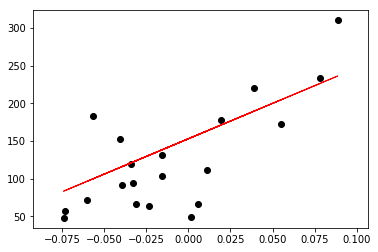

In [4]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np


diabetes = datasets.load_diabetes()


# Use only one feature for training
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]




# X = dataset[:,0:10]
# Y = dataset[:,10:]
# seed = 1

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)

model = XGBClassifier()

model.fit(diabetes_X_train, diabetes_y_train)

#Make predictions for test data
y_pred = model.predict(diabetes_X_test)


plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=1)

plt.show()



In [ ]:
#Import Library
from sklearn.ensemble import GradientBoostingClassifier
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Gradient Boosting Classifier object
model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
# Train the model using the training sets and check score
model.fit(diabetes_X_train, diabetes_y_train)
#Predict Output
predicted= model.predict(diabetes_X_test)
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=1)

plt.show()

In [ ]:
!python pip3 install xgboost


In [ ]:
!python pipinstall xgboost

In [ ]:
!python pip install xgboost

In [ ]:
import pip
pip.main(['install', '<xgboost>'])

In [ ]:
import sys
!{sys.executable} -m pip install xgboost

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [24]:
data = pd.read_csv('kc_house_data.csv')

In [25]:
# Check the number of data points in the data set
print(len(data))
# Check the number of features in the data set
print(len(data.columns))
# Check the data types
print(data.dtypes.unique())

21613
21
[dtype('int64') dtype('O') dtype('float64')]


In [26]:
data.select_dtypes(include=['O']).columns.tolist()



['date']

In [27]:
features = data.iloc[:,3:].columns.tolist()
target = data.iloc[:,2].name
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]


,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


In [28]:
y = data.loc[:,['sqft_living','grade', 'bathrooms', target]].sort_values(target, ascending=True).values
x = np.arange(y.shape[0])

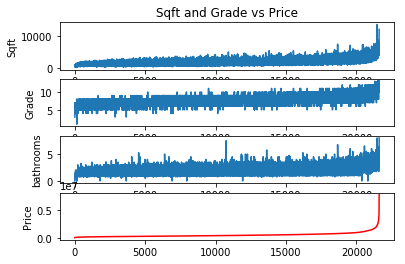

In [29]:
%matplotlib inline
plt.subplot(4,1,1)
plt.plot(x,y[:,0])
plt.title('Sqft and Grade vs Price')
plt.ylabel('Sqft')

plt.subplot(4,1,2)
plt.plot(x,y[:,1])
plt.ylabel('Grade')

plt.subplot(4,1,3)
plt.plot(x,y[:,2])
plt.ylabel('bathrooms')


plt.subplot(4,1,4)
plt.plot(x,y[:,3],'r')
plt.ylabel("Price")

plt.show()

In [30]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [31]:
new_data = data[['zipcode', 'sqft_living', 'sqft_lot','bedrooms', 'bathrooms','floors','waterfront', 'yr_built']]

In [46]:
X = new_data.values
y = data.price.values
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)

In [47]:
traindf, testdf = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [48]:
#print(y_train)
predictions = xgb.predict([ 98119,4450,5440,4,3.5,2,0,1927])
#print(explained_variance_score(predictions,y_test))
#print(X_test)
print(predictions)
#plt.scatter(X_test, y_train, color='black')
#plt.plot(X_test, predictions, color='red', linewidth=1)

plt.show()

[1807667.8]


In [57]:
def MLthingy(q):
    
    import time

    start = time.time()
    
    count = float(0)
    aggregate = 0
    
    xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                                   colsample_bytree=1, max_depth=7)
    new_data = data[['zipcode', 'sqft_living', 'sqft_lot','bedrooms', 'bathrooms','floors','waterfront', 'yr_built']]
        
    while count != 2:
        X = new_data.values
        y = data.price.values
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y ,test_size=0.2)
        traindf, testdf = train_test_split(X_train, test_size = 0.3)
        xgb.fit(X_train,y_train)
        
        predictions = xgb.predict(q)
        #print(explained_variance_score(predictions,y_test))
        #print(X_test)
        #print(predictions)
        aggregate += float(predictions)
        count+= 1
    
    end = time.time()
    print(end - start)
    print(aggregate / count)



In [58]:
MLthingy([98119,4450,5440,4,3.5,2,0,1927])

3.956324815750122
1720870.0625
